In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime,time
import statsmodels.graphics.tsaplots as tsa_plots
import seaborn as sn
import statsmodels.api as smf

In [2]:
airlines=pd.read_csv("Airlines_Data.csv")
airlines["Date"]=pd.to_datetime(airlines["Month"].str.replace(r'-(\d+)$', r'-19\1'))
airlines["month"]=airlines.Date.dt.strftime("%b")
airlines["year"]=airlines.Date.dt.strftime("%Y")

<ipython-input-2-3401461c5e58>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines["Date"]=pd.to_datetime(airlines["Month"].str.replace(r'-(\d+)$', r'-19\1'))


<AxesSubplot:xlabel='month', ylabel='year'>

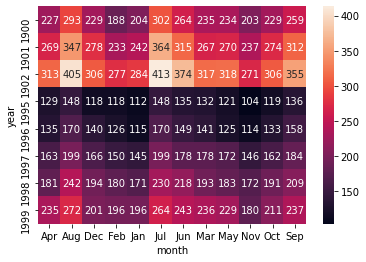

In [3]:
heat_map=pd.pivot_table(airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sn.heatmap(heat_map,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

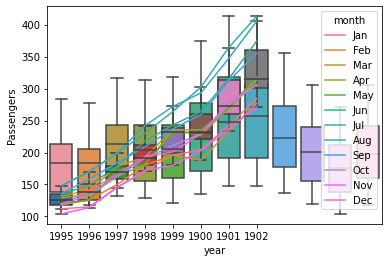

In [4]:
sn.boxplot(x="month",y="Passengers",data=airlines)
sn.boxplot(x="year",y="Passengers",data=airlines)
sn.lineplot(x="year",y="Passengers",hue="month",data=airlines)

<ipython-input-5-055b06f9c86f>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],freq=10)


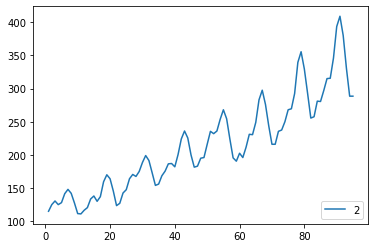

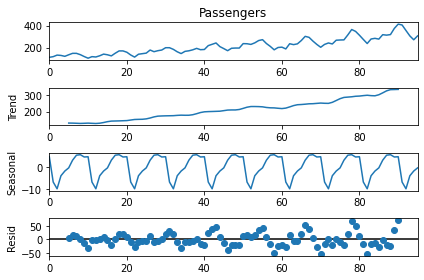

In [5]:
for i in range(2,24,26):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=4)
    
seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],freq=10)
seasonal_ts_add.plot()
train=airlines.head(92)
test=airlines.tail(4)

In [6]:
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

In [13]:
Exp=SimpleExpSmoothing(train["Passengers"]).fit()
Exp_pred=Exp.predict(start=test.index[0],end=test.index[-1])
Exp_mape=MAPE(Exp_pred,test.Passengers)
print(Exp_pred)
print(Exp_mape)

92    405.0
93    405.0
94    405.0
95    405.0
dtype: float64
32.05922100390567


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [14]:
hw=Holt(train["Passengers"]).fit()
hw_pred=hw.predict(start=test.index[0],end=test.index[-1])
hw_mape=MAPE(hw_pred,test.Passengers)
print(hw_pred)
print(hw_mape)

92    408.286301
93    411.563560
94    414.840819
95    418.118078
dtype: float64
34.806452206477374


In [15]:
Exp_add_add=ExponentialSmoothing(train["Passengers"],damped=True,seasonal="add",seasonal_periods=12,trend="add").fit()
Exp_add_add_pred=Exp_add_add.predict(start=test.index[0],end=test.index[-1])
Exp_add_add_Mape=MAPE(Exp_add_add_pred,test.Passengers)
print(Exp_add_add_pred)
print(Exp_add_add_Mape)

<ipython-input-15-49412372d264>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  Exp_add_add=ExponentialSmoothing(train["Passengers"],damped=True,seasonal="add",seasonal_periods=12,trend="add").fit()


92    355.449635
93    317.531901
94    283.414423
95    323.421242
dtype: float64
3.5423592558323493


In [16]:
Exp_mul_add=ExponentialSmoothing(train["Passengers"],damped=True,seasonal="mul",seasonal_periods=12,trend="add").fit()
Exp_mul_add_pred=Exp_mul_add.predict(start=test.index[0],end=test.index[-1])
Exp_mul_add_mape=MAPE(Exp_mul_add_pred,test.Passengers)
print(Exp_mul_add_pred)
print(Exp_mul_add_mape)

<ipython-input-16-f9c65d07cf73>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  Exp_mul_add=ExponentialSmoothing(train["Passengers"],damped=True,seasonal="mul",seasonal_periods=12,trend="add").fit()


92    359.027198
93    314.730400
94    273.249860
95    311.040523
dtype: float64
1.6162325142256315


In [17]:
Table={"Model":pd.Series(["Exp_mape","hw_mape","Exp_add_add_Mape","Exp_mul_add_mape"]),"MAPE VAlUES":pd.Series([Exp_mape,hw_mape,Exp_add_add_Mape,Exp_mul_add_mape])}
Table=pd.DataFrame(Table) 
print(Table)

              Model  MAPE VAlUES
0          Exp_mape    32.059221
1           hw_mape    34.806452
2  Exp_add_add_Mape     3.542359
3  Exp_mul_add_mape     1.616233


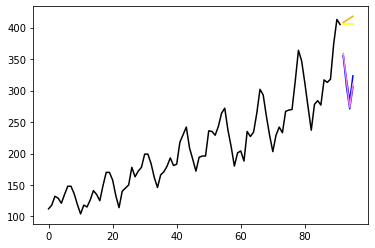

In [12]:
plt.plot(train.index,train["Passengers"],label="Train",color="black") 
plt.plot(test.index,test["Passengers"],label="Test",color="blue")
plt.plot(Exp_pred.index,Exp_pred,label="Simple Exp Smoothing",color="yellow")
plt.plot(hw_pred.index,hw_pred,label="Holts method",color="orange")
plt.plot(Exp_add_add_pred.index,Exp_add_add_pred,label="Exp Smoothing with add trend & add seasonality",color="blue")
plt.plot(Exp_mul_add_pred.index,Exp_mul_add_pred,label="Exp Smoothing with add trend & mul seasonality",color="violet")